In [13]:
import gensim.downloader as api
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from sklearn.decomposition import PCA

import numpy as np
import pickle
import json
import copy
import pandas as pd
from tqdm import tqdm
import scipy.stats as stats


from Vocab import Vocab
vocab = Vocab('data/vocab.csv', 3)
from get_predictions import get_predictions
from helpers import *

from ChainDataset import ChainDataset

chain_test_set = ChainDataset(
    data_dir='data/',
    segment_file='segments.json',
    chain_file='test_chains.json',
    vectors_file='vectors.json',
    split='test'
)


Initialising vocab from file.


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lolab\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
wv_google_300d = api.load('word2vec-google-news-300')
wv_twitter_50d = api.load('glove-twitter-50')


## POS tags distribution


In [4]:
from collections import Counter
import nltk
import pickle
from nltk import word_tokenize
from nltk.tag import pos_tag
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')
nltk.download('universal_tagset')

import matplotlib
import matplotlib.pyplot as plt

with open('oov_dictionary.pickle', 'rb') as f:
    oov_dict = pickle.load(f)

top_10 = ['NOUN', 'DET', 'VERB', 'ADP', 'ADJ', '.', 'ADV', 'NUM', 'PRON', 'CONJ']
top_4 = ['NOUN', 'VERB', 'ADJ', 'ADV']

''' explanation:

ADJ	adjective	new, good, high, special, big, local
ADP	adposition	on, of, at, with, by, into, under
ADV	adverb	really, already, still, early, now
CONJ	conjunction	and, or, but, if, while, although
DET	determiner, article	the, a, some, most, every, no, which
NOUN	noun	year, home, costs, time, Africa
NUM	numeral	twenty-four, fourth, 1991, 14:24
PRT	particle	at, on, out, over per, that, up, with
PRON	pronoun	he, their, her, its, my, I, us
VERB	verb	is, say, told, given, playing, would
.	punctuation marks	. , ; !
X	other	ersatz, esprit, dunno, gr8, univeristy

'''

oov_dict



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lolab\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\lolab\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\lolab\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\lolab\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


{'grey': 'gray',
 'ok.': 'OK',
 't-shirt': 'tshirt',
 'w/': 'with',
 'frige': 'fridge',
 'red/white': 'red and white',
 'doughnuts': 'donuts',
 'didnt': "didn't",
 'ok..': 'ok',
 'dr.': 'dr',
 'no..': 'no',
 'doughnut': 'donut',
 'yes..': 'yes',
 'yellow/orange': 'yellow and orange',
 'pic..': 'picture',
 'umberlla': 'umbrella',
 'cest': 'chest',
 'k..next': 'ok, next',
 'surboard': 'surfboard',
 'blue/white': 'blue and white',
 'man/woman': 'man or woman',
 'doesnt': "doesn't",
 'scheppa': 'schepps',
 'guy/girl': 'guy or girl',
 'blue/green': 'blue and green',
 'schepp': 'schepps',
 'blue/black': 'blue and black',
 'motarcycle': 'motorcycle',
 'red/black': 'red and black',
 'red/white/blue': 'red, white and blue',
 'colour': 'color',
 'close-up': 'closeup',
 'green/yellow': 'green and yellow',
 'red/pink': 'red and pink',
 'buddist': 'buddhist',
 'longsleeves': 'long sleeves',
 'ihave': 'i have',
 'yellow/green': 'yellow and green',
 'no-': 'no',
 'k.': 'ok',
 'surfobard': 'surfboard'

In [12]:
dataset_pred_no_hist, dataset_pred_hist_cp, conditions_inds, condition_seg_hist, dataframe = get_pred_datasets()



loaded model: No history
Initialising vocab from file.
vocab len 3424
Initialising vocab from file.
Loaded seg2ranks and idlist
params. normalize=True, mask=True, weight=5.5, weighting=True, batchsize=1, breaking=False
Dataparams. data_dir=./data, segmentfile=segments.json, vectorfile=vectors.json, chains_file=chains.json
segment dataset with segments.json vectors.json test
history dataset with test_segments.json vectors.json test_chains.json test
processing test

Start prediction
predict no history
{'segment': [5, 212, 4, 166, 5, 12, 22, 782, 29, 234, 213, 10, 4, 416, 14, 12, 22, 7, 6, 49, 11, 6, 155, 295, 11, 6, 811, 16, 9, 95, 10, 5, 17, 8, 12], 'image_set': ['93469', '380128', '14238', '259745', '524866', '341060', '483794', '96757'], 'targets': [5], 'length': 35, 'preds': tensor([[[0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.]]], device='cuda:0'), 'loss': tensor(4.9204, device='cuda:0'), 'ranks': [0]}
getting predicito

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6801/6801 [00:01<00:00, 4275.35it/s]


History


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6801/6801 [00:01<00:00, 4357.30it/s]


In [ ]:
# dataset_pred_no_hist, dataset_pred_hist_cp, conditions_inds, condition_seg_hist

dataset_pred_no_hist

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 121/121 [00:00<00:00, 744.31it/s]


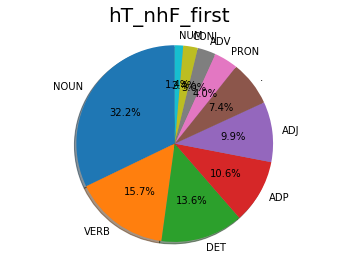

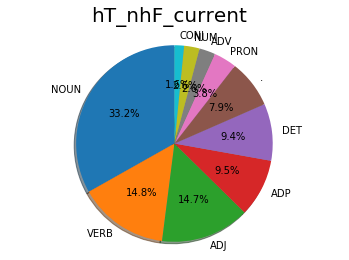

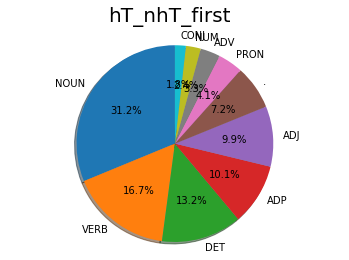

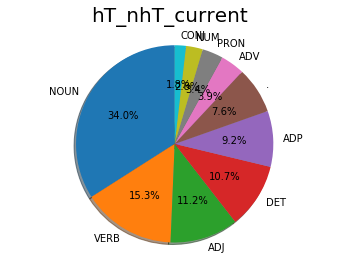

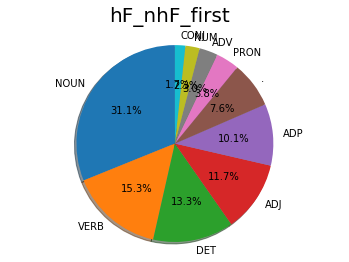

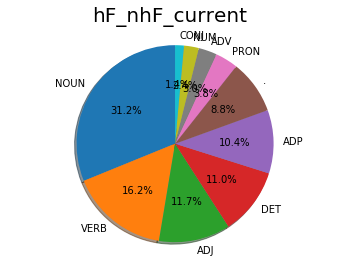

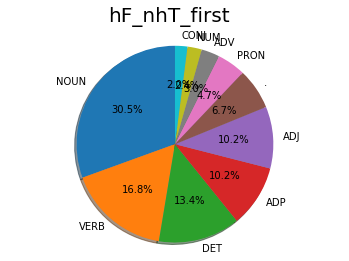

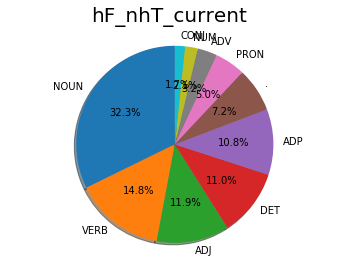

In [196]:
def pos_tag_distribution_per_group(group):
    segments = list(condition_seg_hist[group])
    for segment in tqdm(segments):
        if condition_seg_hist[group][segment] == {}:
                continue

    #   get sentences per segment
        first_seg, current_seg = convert_to_sentences(segment, condition_seg_hist[group])
        first_sentence_dict = sentence_to_pos_tags(first_seg)
        current_sentence_dict = sentence_to_pos_tags(current_seg)

    #   update dicts
        update_dict(first_sentence_dict, total_first_seg_dict)
        update_dict(current_sentence_dict, total_current_dict)

    return total_first_seg_dict, total_current_dict


def convert_to_sentences(segment, dataset):
          
    # decode first and current sentence 
    first_seg = list(dataset[segment].values())[0]['first_seg']

    current_seg = list(dataset[segment].values())[0]['current_seg']
    dec_first_seg = vocab.decode(first_seg)
    dec_current_seg = vocab.decode(current_seg)
    
    return dec_first_seg, dec_current_seg



def update_dict(new_dict, total_dict):
    for key, value in new_dict.items():
        new_key = key
        new_value = value
#         print("new key", new_key)
#         print("new_value", new_value)
        for key, value in total_dict.items():
            if key == new_key:
                current_value = total_dict[key] 
                update_value = current_value + new_value[0]
                total_dict[key] = update_value
                
    return None

def dict_to_result(first_seg_dict, group, result, place): #   convert dict to list
    
    dict_list = []
    total = 0
    for key, value in first_seg_dict.items():
        temp = [value,key]
        total += value
        dict_list.append(temp)
    
#   convert to percentages
    for tag in dict_list:
        tag[0] = tag[0] / total
    
    dict_list.sort(reverse = True)
    group = group + "_" +  place
    
    result[group] = dict_list
    
    return result

    


groups = ['hT_nhF', 'hT_nhT', 'hF_nhF','hF_nhT']
# groups = ['hT_nhF', 'hF_nhF']
result = {}
for group in groups:
    
    total_first_seg_dict = {
    'NOUN': 0,
    'DET': 0,
    'VERB': 0,
    'ADP': 0,
    'ADJ': 0,
    '.': 0,
    'ADV': 0,
    'NUM': 0,
    'PRON': 0,
    'CONJ': 0
                            }

    total_current_dict = {
        'NOUN': 0,
        'DET': 0,
        'VERB': 0,
        'ADP': 0,
        'ADJ': 0,
        '.': 0,
        'ADV': 0,
        'NUM': 0,
        'PRON': 0,
        'CONJ': 0
                        }
    
    total_first_seg_dict, total_current_dict = pos_tag_distribution_per_group(group)
    result = dict_to_result(total_first_seg_dict, group, result, "first")
    result = dict_to_result(total_current_dict, group, result, "current")
    
# print(result)
for key, value in result.items():
    plot_dict(key, value)



    
    


In [190]:
# dicti = {'hT_nhF': [[0.32154088050314467, 'NOUN'], [0.15683962264150944, 'VERB'], [0.13561320754716982, 'DET'], [0.10573899371069183, 'ADP'], [0.09905660377358491, 'ADJ'], [0.07389937106918239, '.'], [0.03970125786163522, 'PRON'], [0.029874213836477988, 'ADV'], [0.02397798742138365, 'CONJ'], [0.013757861635220126, 'NUM']]}

# dicti
def plot_dict(plot_title, values):
    labels = []
    all_values = []

#     print("values", values)
#     print(len(values))
    for v in range(len(values)):
#         print("v", values[v])

        labels.append(values[v][1])
        all_values.append(values[v][0])
#     print("KLAAAR")
    
#     print()



    fig1, ax1 = plt.subplots()
    ax1.pie(all_values, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    fig1.suptitle(plot_title, fontsize=20)
    plt.show()



In [67]:
# text = " Guru99 is one of the best sites to learn WEB, SAP, Ethical Hacking and much more online."
messages = ['ik ben bob en daar is het strand maar toen zei hij']



def sentence_to_pos_tags(sentence):
    
    lower_case_sentence = []
    correct_sentence = [] 
    pos_tags = []
    

    for word in sentence:
        lower_case_sentence.append(word.lower())
    

    for word in lower_case_sentence:

        if word not in oov_dict:
            correct_sentence.append(word)
        else:
            correct_sentence.append(oov_dict[word])

#   tag the sentence
    try:
        pos_tags += [word[1] for word in pos_tag(correct_sentence, tagset='universal')]
#         print("mistake")
    except:
        None

        
    pos_tag_dict = dict()       
    for key,value in dict(Counter(pos_tags)).items():
        pos_tag_dict[key] = [value]  

    return pos_tag_dict


In [55]:
test_dict = {
    'NOUN': 0,
    'DET': 0,
    'VERB': 0,
    'ADP': 0,
    'ADJ': 0,
    '.': 0,
    'ADV': 0,
    'NUM': 0,
    'PRON': 0,
    'CONJ': 0
}

new_dict = {
    'NOUN': 5,
    'ADV': 20,
}

for key, value in new_dict.items():
    new_key = key
    new_value = value
    print("new key", new_key)
    print("new_value", new_value)
    for key, value in test_dict.items():
        if key == new_key:
            print("found", key)
            test_dict[key] += new_value
            
print(test_dict)

new key NOUN
new_value 5
found NOUN
new key ADV
new_value 20
found ADV
{'NOUN': 5, 'DET': 0, 'VERB': 0, 'ADP': 0, 'ADJ': 0, '.': 0, 'ADV': 20, 'NUM': 0, 'PRON': 0, 'CONJ': 0}


## Experiments with leaving out tags in segments :)

In [72]:
chain_test_set[10]

{'game_id': '3R2UR8A0IBELL07JV1VG7ISBNQAOX23WMINLGALC18GY2NUMUBSANWXRHCAO',
 'chain_id': 4,
 'segment_id': 17,
 'reference_image': '483794',
 'source_language': [4,
  21,
  11,
  757,
  18,
  6,
  26,
  49,
  10,
  5,
  41,
  4,
  39,
  49,
  10,
  5,
  11,
  9,
  262,
  24,
  10,
  4,
  17,
  5,
  17,
  8,
  7,
  30,
  5,
  148,
  24,
  15,
  42,
  23,
  39,
  49,
  10,
  4,
  13,
  5,
  80,
  18,
  128,
  68,
  22,
  10,
  4,
  155,
  295,
  16,
  9,
  95,
  11,
  6,
  811,
  10,
  5,
  17,
  8,
  7,
  30],
 'source_length': 61,
 'target_language': [4, 148, 24, 11, 39, 49, 10, 5, 8, 12, 31, 7, 20, 21],
 'target_length': 15,
 'images': ['468357',
  '522129',
  '93469',
  '420523',
  '14238',
  '524866',
  '96757',
  '82894'],
 'num_images': 8,
 'reference_image_features': [1.8189698457717896,
  0.26168951392173767,
  0.1769702136516571,
  0.40922534465789795,
  0.5527492165565491,
  0.2669677436351776,
  0.1298380047082901,
  0.10862626135349274,
  0.012135141529142857,
  0.1404225379

In [16]:
from SegmentDataset import SegmentDataset

segment_test_set = SegmentDataset(
    data_dir='data/',
    segment_file='segments.json',
    vectors_file='vectors.json',
    split='test'
)

print("Testing the SegmentDataset class item getter...")
print("Dataset contains {} segment samples".format(len(segment_test_set)))
sample_id = 2
sample = segment_test_set[sample_id]
print("Segment {}:".format(sample_id))
print("Image set: {}".format(sample["image_set"]))
print("Target image index(es): {}".format(sample["targets"]))
# print("Target image Features: {}".format([segment_test_set.image_features[sample["image_set"][int(target)]] for target in sample["targets"]]))
print("Encoded segment: {}".format(sample["segment"]))
print("Decoded segment dialogue: {}".format(vocab.decode(sample["segment"])))
print("Segment length: ", sample["length"])
print("\nDone.")

Testing the SegmentDataset class item getter...
Dataset contains 6801 segment samples
Segment 2:
Image set: ['93469', '380128', '14238', '259745', '524866', '341060', '483794', '96757']
Target image index(es): [6, 2, 3]
Encoded segment: [4, 21, 11, 757, 18, 6, 26, 49, 10, 5, 41]
Decoded segment dialogue: ['-A-', 'one', 'with', 'roses', 'and', 'a', 'white', 'laptop', '?', '-B-', 'nope']
Segment length:  11

Done.


In [164]:
def remove_tag(tag, segment_test_set):
    for segment_id, segment_data in enumerate(segment_test_set):
        
        if segment_id > 20:
            break
        pos_tags = []
        lower_case_sentence = []
        correct_sentence = []

        encoded_segment = vocab.decode(segment_data['segment'])

        for word in encoded_segment:
            lower_case_sentence.append(word.lower())

        for word in lower_case_sentence:

            if word not in oov_dict:
                correct_sentence.append(word)
            else:
                correct_sentence.append(oov_dict[word])

        try:

            pos_tags += [word[1] for word in pos_tag(correct_sentence, tagset='universal')]

        #   list with indices to remove
            remove_index = []
            for index, word in enumerate(pos_tags):
                if word == tag:
                    remove_index.append(index)
                    
#             print(remove_index)

            for index in reversed(remove_index):
                del correct_sentence[index]

            encoded_sentence = vocab.encode(correct_sentence)

            segment_test_set[segment_id]['segment'] = encoded_sentence
            segment_test_set[segment_id]['length'] = len(encoded_sentence)


        except:
            continue
    
    return segment_test_set
    
from SegmentDataset import SegmentDataset

segment_test_set = SegmentDataset(
    data_dir='data/',
    segment_file='segments.json',
    vectors_file='vectors.json',
    split='test'
)

# Get a deepcopy of the chain list
segment_test_set = copy.deepcopy(segment_test_set)
segment_test_set_noun = remove_tag("NOUN", segment_test_set)

print(segment_test_set_noun[1])
# segment_test_set_verb = remove_tag("VERB", segment_test_set)
# segment_test_set_adj = remove_tag("ADJ", segment_test_set)
# segment_test_set_adv = remove_tag("ADV", segment_test_set)


{'segment': [12, 22, 7, 21, 11, 16, 9, 10, 1, 13, 12, 31], 'image_set': ['93469', '380128', '14238', '259745', '524866', '341060', '483794', '96757'], 'targets': [0], 'length': 12}


In [18]:
from ChainDataset import ChainDataset

print("Testing the ChainDataset class initialization...")

chain_test_set = ChainDataset(
    data_dir='data/',
    segment_file='segments.json',
    chain_file='test_chains.json',
    vectors_file='vectors.json',
    split='test'
)

print("Dataset contains {} cains.".format(len(chain_test_set.chains)))

sample_id = 5
sample = chain_test_set.chains[sample_id]

print("Chain {}:".format(sample_id))
print("Source Game ID: {}".format(sample["game_id"]))
print("Target image index: {}".format(sample["target"]))
print("Chain length: {}".format(len(sample["segments"])))
print("Segment IDs: {}".format(sample["segments"]))
print("Segment lengths: ", sample["lengths"])
print("First segment encoding: {}".format(chain_test_set.segments[sample["segments"][0]]["segment"]))
print("First segment decoded dialogue: {}".format(vocab.decode(chain_test_set.segments[sample["segments"][0]]["segment"])))
print("Second segment decoded dialogue: {}".format(vocab.decode(chain_test_set.segments[sample["segments"][1]]["segment"])))
# print("third segment decoded dialogue: {}".format(vocab.decode(chain_test_set.segments[sample["segments"][2]]["segment"])))

print("Reference chain and segments' associated image sets:")
for segment in sample["segments"]:
    print(vocab.decode(chain_test_set.segments[segment]["segment"]))
    print(chain_test_set.segments[segment]["image_set"])
print("\nDone.")

print("Testing the ChainDataset class item getter...")


Testing the ChainDataset class initialization...
Dataset contains 2811 cains.
Chain 5:
Source Game ID: 3R2UR8A0IBELL07JV1VG7ISBNQAOX23WMINLGALC18GY2NUMUBSANWXRHCAO
Target image index: 522129
Chain length: 4
Segment IDs: [3, 10, 12, 15]
Segment lengths:  [23, 23, 21, 19]
First segment encoding: [5, 38, 191, 23, 127, 11, 6, 120, 23, 127, 15, 9, 314, 10, 4, 13, 5, 80, 14, 128, 68, 22, 10]
First segment decoded dialogue: ['-B-', 'two', 'plates', 'of', 'food', 'with', 'a', 'bowl', 'of', 'food', 'in', 'the', 'middle', '?', '-A-', 'no', '-B-', 'okay', '.', 'how', 'about', 'you', '?']
Second segment decoded dialogue: ['-A-', 'do', 'you', 'have', 'the', 'one', 'with', 'two', 'plates', 'and', 'the', 'salsa', 'in', 'the', 'middle', '?', '-B-', 'i', 'do', "n't", 'have', 'that', 'one']
Reference chain and segments' associated image sets:
['-B-', 'two', 'plates', 'of', 'food', 'with', 'a', 'bowl', 'of', 'food', 'in', 'the', 'middle', '?', '-A-', 'no', '-B-', 'okay', '.', 'how', 'about', 'you', '?']


In [182]:
from ChainDataset import ChainDataset

chain_test_set = ChainDataset(
    data_dir='data/',
    segment_file='segments.json',
    chain_file='test_chains.json',
    vectors_file='vectors.json',
    split='test'
)




In [167]:
history_dict = {}

for segment in tqdm(all_segments):
    for index, chain_data in enumerate(chain_test_set.chains):
    
        chain_segments = chain_data['segments']
        if segment in chain_segments:

    # als segment al voorkomt in dict, voeg dan nieuwe index toe
            if segment in history_dict:
                current_list = history_dict[segment]
                current_list.append(index)
                history_dict[segment] = current_list
     #   als segment nog niet in dict voorkomt voeg dan nieuwe toe
            else:
                history_dict[segment] = [index]

# history_dict

for key, value in history_dict.items():
    print(key)
    print(value)


# geef de segment_id en het returnt de index waar het in staat

# segment_id: [ index]
# {0: [0],
#  7: [0],
#  8: [0, 4],

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6801/6801 [00:07<00:00, 942.02it/s]


0
[0]
7
[0]
8
[0, 4]
1
[1]
5
[1]
11
[1]
16
[1]
2
[2, 3, 4]
13
[2]
6
[3]
14
[3]
4
[4]
17
[4]
3
[5]
10
[5, 6]
12
[5]
15
[5]
9
[6]
18
[6]
19
[6]
20
[7]
24
[7, 8]
33
[7]
37
[7, 14]
21
[8]
26
[8]
22
[9, 10]
23
[9]
30
[9]
28
[10, 11]
32
[10, 12]
34
[10, 12]
25
[11]
27
[11]
31
[11]
36
[11]
29
[12]
35
[13]
38
[15]
47
[15]
48
[15]
56
[15]
39
[16]
44
[16]
45
[16]
49
[16]
40
[17]
46
[17]
41
[18]
50
[18]
53
[18]
58
[18]
42
[19]
51
[19, 20]
52
[19, 21]
43
[20]
54
[20]
57
[20]
55
[21]
59
[22]
63
[22]
67
[22, 28]
71
[22]
60
[23, 24]
66
[24]
69
[24, 25]
74
[24]
61
[25]
73
[25]
77
[25]
62
[26, 27]
68
[26]
70
[26]
64
[28]
75
[28]
76
[28, 29]
65
[29]
72
[29]
78
[30]
82
[30, 33]
79
[31]
86
[31, 35]
88
[31, 34]
89
[31, 32]
80
[32, 33, 34]
84
[32, 36]
83
[33, 34]
85
[33]
81
[34, 35]
87
[36]
90
[37, 38, 39]
95
[37]
100
[37]
104
[37]
91
[38, 40]
98
[38]
99
[38]
97
[39]
96
[40]
103
[40]
92
[41]
102
[41]
106
[41]
93
[42]
101
[42]
105
[42]
94
[43]
107
[43]
108
[44]
113
[44]
116
[44]
109
[45]
112
[45]
117
[45, 50

KeyboardInterrupt: 

In [184]:
print(chain_test_set.chains[0])

{'game_id': '3R2UR8A0IBELL07JV1VG7ISBNQAOX23WMINLGALC18GY2NUMUBSANWXRHCAO', 'chain_id': 3279, 'target': '341060', 'segments': [0, 7, 8], 'lengths': [35, 15, 33]}


In [210]:
def update_history_dataset(segment_dataset):
    
    from ChainDataset import ChainDataset

    chain_test_set = ChainDataset(
        data_dir='data/',
        segment_file='segments.json',
        chain_file='test_chains.json',
        vectors_file='vectors.json',
        split='test'
    )
    
    chain_data = copy.deepcopy(chain_test_set.chains)
#     chain_data = chain_test_set.chains
    
#     print(chain_data)
#     print(chain_data[1])

    
    for segment_id, segment_data in enumerate(segment_dataset):
        segment_length = segment_data['length']
        
#       geef segment id, krijg terug op welke index in de histroy file het staat
        index = history_dict[segment_id]
    
        print("seg id ", segment_id)
        print("seg length", segment_length)
    
        print("index", index)
    
#       pak alle indices in de history file en pas daar de lengte aan
        for i in index:
            print("CHAIN", chain_data[i])
            all_segments_for_that_index = chain_data[i]['segments']
            for ii, seg in enumerate(all_segments_for_that_index):
                print("ii", ii)
                print("seg", seg)
                if segment_id == seg:
                    print("HIER MOET JE LENGTE VERVANGEN", chain_data[i]['lengths'][0])
                    chain_data[i]['lengths'][ii] = segment_length
                    print("DAARNA", chain_data[i])
                    
    return chain_data
                    
                

segment_test_set_adv = remove_tag("ADV", segment_test_set)
chain_data = update_history_dataset(segment_test_set_adv)


chain_data[1]



seg id  0
seg length 22
index [0]
CHAIN {'game_id': '3R2UR8A0IBELL07JV1VG7ISBNQAOX23WMINLGALC18GY2NUMUBSANWXRHCAO', 'chain_id': 3279, 'target': '341060', 'segments': [0, 7, 8], 'lengths': [35, 15, 33]}
ii 0
seg 0
HIER MOET JE LENGTE VERVANGEN 35
DAARNA {'game_id': '3R2UR8A0IBELL07JV1VG7ISBNQAOX23WMINLGALC18GY2NUMUBSANWXRHCAO', 'chain_id': 3279, 'target': '341060', 'segments': [0, 7, 8], 'lengths': [22, 15, 33]}
ii 1
seg 7
ii 2
seg 8
seg id  1
seg length 11
index [1]
CHAIN {'game_id': '3R2UR8A0IBELL07JV1VG7ISBNQAOX23WMINLGALC18GY2NUMUBSANWXRHCAO', 'chain_id': 3280, 'target': '93469', 'segments': [1, 5, 11, 16], 'lengths': [16, 14, 11, 10]}
ii 0
seg 1
HIER MOET JE LENGTE VERVANGEN 16
DAARNA {'game_id': '3R2UR8A0IBELL07JV1VG7ISBNQAOX23WMINLGALC18GY2NUMUBSANWXRHCAO', 'chain_id': 3280, 'target': '93469', 'segments': [1, 5, 11, 16], 'lengths': [11, 14, 11, 10]}
ii 1
seg 5
ii 2
seg 11
ii 3
seg 16
seg id  2
seg length 8
index [2, 3, 4]
CHAIN {'game_id': '3R2UR8A0IBELL07JV1VG7ISBNQAOX23WMINLGAL

CHAIN {'game_id': '3R2UR8A0IBELL07JV1VG7ISBNQAOX23WMINLGALC18GY2NUMUBSANWXRHCAO', 'chain_id': 3282, 'target': '483794', 'segments': [2, 6, 14], 'lengths': [8, 14, 24]}
ii 0
seg 2
ii 1
seg 6
ii 2
seg 14
HIER MOET JE LENGTE VERVANGEN 8
DAARNA {'game_id': '3R2UR8A0IBELL07JV1VG7ISBNQAOX23WMINLGALC18GY2NUMUBSANWXRHCAO', 'chain_id': 3282, 'target': '483794', 'segments': [2, 6, 14], 'lengths': [8, 14, 17]}
seg id  15
seg length 13
index [5]
CHAIN {'game_id': '3R2UR8A0IBELL07JV1VG7ISBNQAOX23WMINLGALC18GY2NUMUBSANWXRHCAO', 'chain_id': 3284, 'target': '522129', 'segments': [3, 10, 12, 15], 'lengths': [16, 16, 13, 19]}
ii 0
seg 3
ii 1
seg 10
ii 2
seg 12
ii 3
seg 15
HIER MOET JE LENGTE VERVANGEN 16
DAARNA {'game_id': '3R2UR8A0IBELL07JV1VG7ISBNQAOX23WMINLGALC18GY2NUMUBSANWXRHCAO', 'chain_id': 3284, 'target': '522129', 'segments': [3, 10, 12, 15], 'lengths': [16, 16, 13, 13]}
seg id  16
seg length 7
index [1]
CHAIN {'game_id': '3R2UR8A0IBELL07JV1VG7ISBNQAOX23WMINLGALC18GY2NUMUBSANWXRHCAO', 'chain_id

KeyboardInterrupt: 

In [173]:
segment_test_set_adv = remove_tag("ADV", segment_test_set)

segment_test_set_adv[1]

{'segment': [12, 22, 7, 21, 11, 16, 9, 10, 1, 13, 12],
 'image_set': ['93469',
  '380128',
  '14238',
  '259745',
  '524866',
  '341060',
  '483794',
  '96757'],
 'targets': [0],
 'length': 11}